# 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [58]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%config InlineBackend.figure_format= 'retina'

# # 코랩 환경 이용시 사용 
# !apt -qq -y install fonts-nanum
# import matplotlib.font_manager as fm 
# fontpath= '/usr/share/fonts/truetype/NanumBarunGothic.ttf'

**글꼴 변경에 대한 부분은 [Koo's.Co|matolotlib 한글 펀트 설정, 글꼴 변경](https://koosco.tistory.com/38)을 참고했습니다.**

### 일부에서만 수정하고 싶은 경우

In [59]:
import matplotlib.font_manager as fm 

# 로컬상에 위치한 글꼴의 위치를 지정합니다. 
fontpath= 'C:/Users/wnsgn/AppData/Local/Microsoft/Windows/Fonts/SCDream6.otf'
# font manager에 경로를 넘겨주어 객체를 생성합니다. 
fontprop = fm.FontProperties(fname= fontpath)

이후, 그림을 그릴 때 마다 글자가 들어가는 부분에 fontproperties=fontprop옵션을 지정하면 글자가 출력됩니다. 

### 전체에서 적용하고자 하는 경우 

In [60]:
print(mpl.get_cachedir())

C:\Users\wnsgn\.matplotlib


In [65]:
import json 
from pprint import pprint 

with open('C:\\Users\\wnsgn\\.matplotlib\\fontlist-v330.json', 'r') as f:

    json_data = json.load(f)

pprint(json.dumps(json_data) )

('{"_version": 330, "_FontManager__default_weight": "normal", "default_size": '
 'null, "defaultFamily": {"ttf": "DejaVu Sans", "afm": "Helvetica"}, '
 '"afmlist": [{"fname": "fonts\\\\afm\\\\pagdo8a.afm", "name": "ITC Avant '
 'Garde Gothic", "style": "italic", "variant": "normal", "weight": "demi", '
 '"stretch": "normal", "size": "scalable", "__class__": "FontEntry"}, '
 '{"fname": "fonts\\\\afm\\\\pagko8a.afm", "name": "ITC Avant Garde Gothic", '
 '"style": "italic", "variant": "normal", "weight": "book", "stretch": '
 '"normal", "size": "scalable", "__class__": "FontEntry"}, {"fname": '
 '"fonts\\\\afm\\\\pbkli8a.afm", "name": "ITC Bookman", "style": "italic", '
 '"variant": "normal", "weight": "light", "stretch": "normal", "size": '
 '"scalable", "__class__": "FontEntry"}, {"fname": '
 '"fonts\\\\pdfcorefonts\\\\Helvetica.afm", "name": "Helvetica", "style": '
 '"normal", "variant": "normal", "weight": "medium", "stretch": "normal", '
 '"size": "scalable", "__class__": "FontEntry"

1. print(mpl.get_cachedir())를 통해 케쉬 데이터가 존재하는 파일을 에디터를 통해 열어본 뒤,
2. 적용한 폰트 객체의 name부분을 확인합니다. 
3. 이번 예시의 경우  
```
{
      "fname": "C:\\Users\\wnsgn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream6.otf",
      "name": "S-Core Dream",
      "style": "normal",
      "variant": "normal",
      "weight": 600,
      "stretch": "normal",
      "size": "scalable",
      "__class__": "FontEntry"
    }
```
으로 표현되었고,  
    
"name": "S-Core Dream",을 통해 해당 폰트의 지정 이름을 확인할 수 있었습니다.


In [61]:
# 로컬상에 위치한 글꼴의 위치를 지정합니다. 
fontpath= 'C:/Users/wnsgn/AppData/Local/Microsoft/Windows/Fonts/SCDream6.otf'
# font manager에 경로를 넘겨주어 객체를 생성합니다. 
fontprop = fm.FontProperties(fname= fontpath, size=10)

# fontfamily 설정을 변경해줍니다. 
plt.rc('font', family='S-Core Dream')
mpl.font_manager._rebuild()

## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [4]:
# !set -x \
# && pip install konlpy \
# && curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

**Mecab의 설치 방법은['여기'](https://cleancode-ws.tistory.com/97)를 참조하세요**

## 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [5]:
import urllib.request 

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [6]:
raw= [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


## 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [7]:
from konlpy.tag import Mecab

In [11]:
# 초기화 시 오류가 발생해, 에러 코드에 나온 바와 같이 초기화시 dict의 경로를 함께 입력힙니다.
tagger = Mecab('C:\\mecab\\mecab-ko-dic')

In [15]:
nouns = [] 
for review in reviews:
    for noun in tagger.nouns(review):
        nouns.append(noun)
# 각각의 문장을 Mecab.nouns에 입력해 명사만을 추출합니다. 
# 물론 Mecab이외에도 konlypy.tag의 okt 등으로 토큰화 및 추출이 가능하지만, mecab의 성능이 우수하기 때문에 mecab을 사용합니다. 
nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [32]:
# 명사중에서도 존재하는 불용어를 한번 더 제거해줍니다. 
# 또한 빈도가 너무 큰 단어도 제거해줍니다. 

# 빈도 체크 
count_dict= {}
for noun in nouns:
    if noun in count_dict.keys():
        pre_value = count_dict[noun]
        value = pre_value + 1
        count_dict[noun] = value
    else:
        count_dict[noun] = 1 
        
# 빈도를 기준으로 정렬합니다.
count_dict = sorted(count_dict.items(), key = lambda item: item[1], reverse=True)
count_dict = dict(count_dict)

In [33]:
# 결과 확인 
count_dict

{'영화': 77222,
 '것': 12346,
 '점': 11593,
 '거': 10204,
 '수': 9988,
 '연기': 9175,
 '최고': 8813,
 '평점': 8514,
 '스토리': 7163,
 '나': 6953,
 '생각': 6943,
 '말': 6931,
 '드라마': 6896,
 '내': 6786,
 '사람': 6742,
 '게': 6674,
 '때': 6504,
 '감동': 6489,
 '듯': 6385,
 '배우': 5893,
 '내용': 5731,
 '감독': 5629,
 '재미': 5479,
 '중': 5380,
 '시간': 5320,
 '년': 4936,
 '사랑': 4741,
 '쓰레기': 4585,
 '번': 4221,
 '작품': 3985,
 '이거': 3930,
 '하나': 3923,
 '잼': 3904,
 '끝': 3736,
 '정도': 3656,
 '이건': 3650,
 '마지막': 3647,
 '개': 3616,
 '액션': 3568,
 '기대': 3465,
 '분': 3274,
 '건': 3269,
 '장면': 3262,
 '만': 3171,
 '이게': 3046,
 '줄': 3045,
 '편': 3044,
 '최악': 3019,
 '돈': 2980,
 '뭐': 2952,
 '이야기': 2947,
 '이해': 2745,
 '애': 2730,
 '명작': 2685,
 '여자': 2678,
 '이상': 2676,
 '처음': 2673,
 '한국': 2640,
 '주인공': 2553,
 '우리': 2531,
 '걸': 2458,
 '연출': 2376,
 '때문': 2371,
 '기억': 2364,
 '현실': 2193,
 '난': 2189,
 '마음': 2128,
 '전': 2125,
 '굿': 2110,
 '일': 2083,
 '남자': 2078,
 '결말': 2066,
 '인생': 2060,
 '공포': 2048,
 '전개': 2035,
 '짜증': 2011,
 '소재': 1999,
 '느낌': 1950,
 '필요'

In [39]:
stopwords= "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 씨 밋 짱 뉴 께 굿 도"
stopwords = stopwords.split(' ')
stopwords

['영화',
 '전',
 '난',
 '일',
 '걸',
 '뭐',
 '줄',
 '만',
 '건',
 '분',
 '개',
 '끝',
 '잼',
 '이거',
 '번',
 '중',
 '듯',
 '때',
 '게',
 '내',
 '말',
 '나',
 '수',
 '거',
 '점',
 '것',
 '씨',
 '밋',
 '짱',
 '뉴',
 '께',
 '굿',
 '도']

### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [40]:
nouns = [] 
for review in reviews:
    for noun in tagger.nouns(review):
        if noun not in stopwords:
            nouns.append(noun)
nouns

['디자인',
 '학생',
 '외국',
 '디자이너',
 '그',
 '전통',
 '발전',
 '문화',
 '산업',
 '우리',
 '나라',
 '시절',
 '열정',
 '노라노',
 '전통',
 '저',
 '사람',
 '꿈',
 '감사',
 '폴리스',
 '스토리',
 '시리즈',
 '하나',
 '최고',
 '연기',
 '생각',
 '몰입',
 '안개',
 '밤하늘',
 '초승달',
 '사랑',
 '사람',
 '처음',
 '감동',
 '감동',
 '전쟁',
 '빠',
 '바보',
 '병',
 '쉰',
 '인',
 '나이',
 '감동',
 '훗날',
 '보면대',
 '사',
 '하나',
 '하나',
 '감정',
 '완벽',
 '이해',
 '고질라',
 '니무',
 '오페라',
 '작품',
 '극단',
 '평갈',
 '림',
 '반전',
 '평점',
 '긴장감',
 '스릴감',
 '최고',
 '전장',
 '공포',
 '고시',
 '이터',
 '소재',
 '뿐',
 '관련',
 '최고',
 '밀회',
 '상당',
 '수작',
 '일본',
 '년',
 '최고',
 '마음',
 '임팩트',
 '일품',
 '오랜만',
 '범죄',
 '스릴러',
 '사랑',
 '마디',
 '밤',
 '징',
 '텅',
 '교복',
 '션',
 '자이',
 '볼펜',
 '자국',
 '마음',
 '형태',
 '마지막',
 '씬',
 '강압',
 '용서',
 '뇌',
 '용서',
 '비판',
 '중세',
 '시대',
 '명작',
 '평점',
 '시간',
 '영상',
 '존재',
 '제니퍼코넬리',
 '아역',
 '시절',
 '로버트드니로',
 '마지막',
 '장면',
 '가슴',
 '속',
 '기억',
 '최고',
 '명작',
 '사람',
 '짓',
 '인간',
 '잠재',
 '악마',
 '시간',
 '공간',
 '속',
 '존속',
 '다큐',
 '그것',
 '광적',
 '재현',
 '최고',
 '삼',
 '동안',
 '잠',
 '여운',
 '실화',
 '충격',
 '어디',
 '경각심',


## 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [41]:
from collections import Counter

In [42]:
nouns_counter = Counter(nouns)
# 가장 빈도가 높은 상위 50개 결과를 반환합니다. 
top_nouns = dict(nouns_counter.most_common(50))
print(top_nouns)

{'연기': 9175, '최고': 8813, '평점': 8514, '스토리': 7163, '생각': 6943, '드라마': 6896, '사람': 6742, '감동': 6489, '배우': 5893, '내용': 5731, '감독': 5629, '재미': 5479, '시간': 5320, '년': 4936, '사랑': 4741, '쓰레기': 4585, '작품': 3985, '하나': 3923, '정도': 3656, '이건': 3650, '마지막': 3647, '액션': 3568, '기대': 3465, '장면': 3262, '이게': 3046, '편': 3044, '최악': 3019, '돈': 2980, '이야기': 2947, '이해': 2745, '애': 2730, '명작': 2685, '여자': 2678, '이상': 2676, '처음': 2673, '한국': 2640, '주인공': 2553, '우리': 2531, '연출': 2376, '때문': 2371, '기억': 2364, '현실': 2193, '마음': 2128, '남자': 2078, '결말': 2066, '인생': 2060, '공포': 2048, '전개': 2035, '짜증': 2011, '소재': 1999}


## 단어 빈도 시각화

In [43]:
import numpy as np

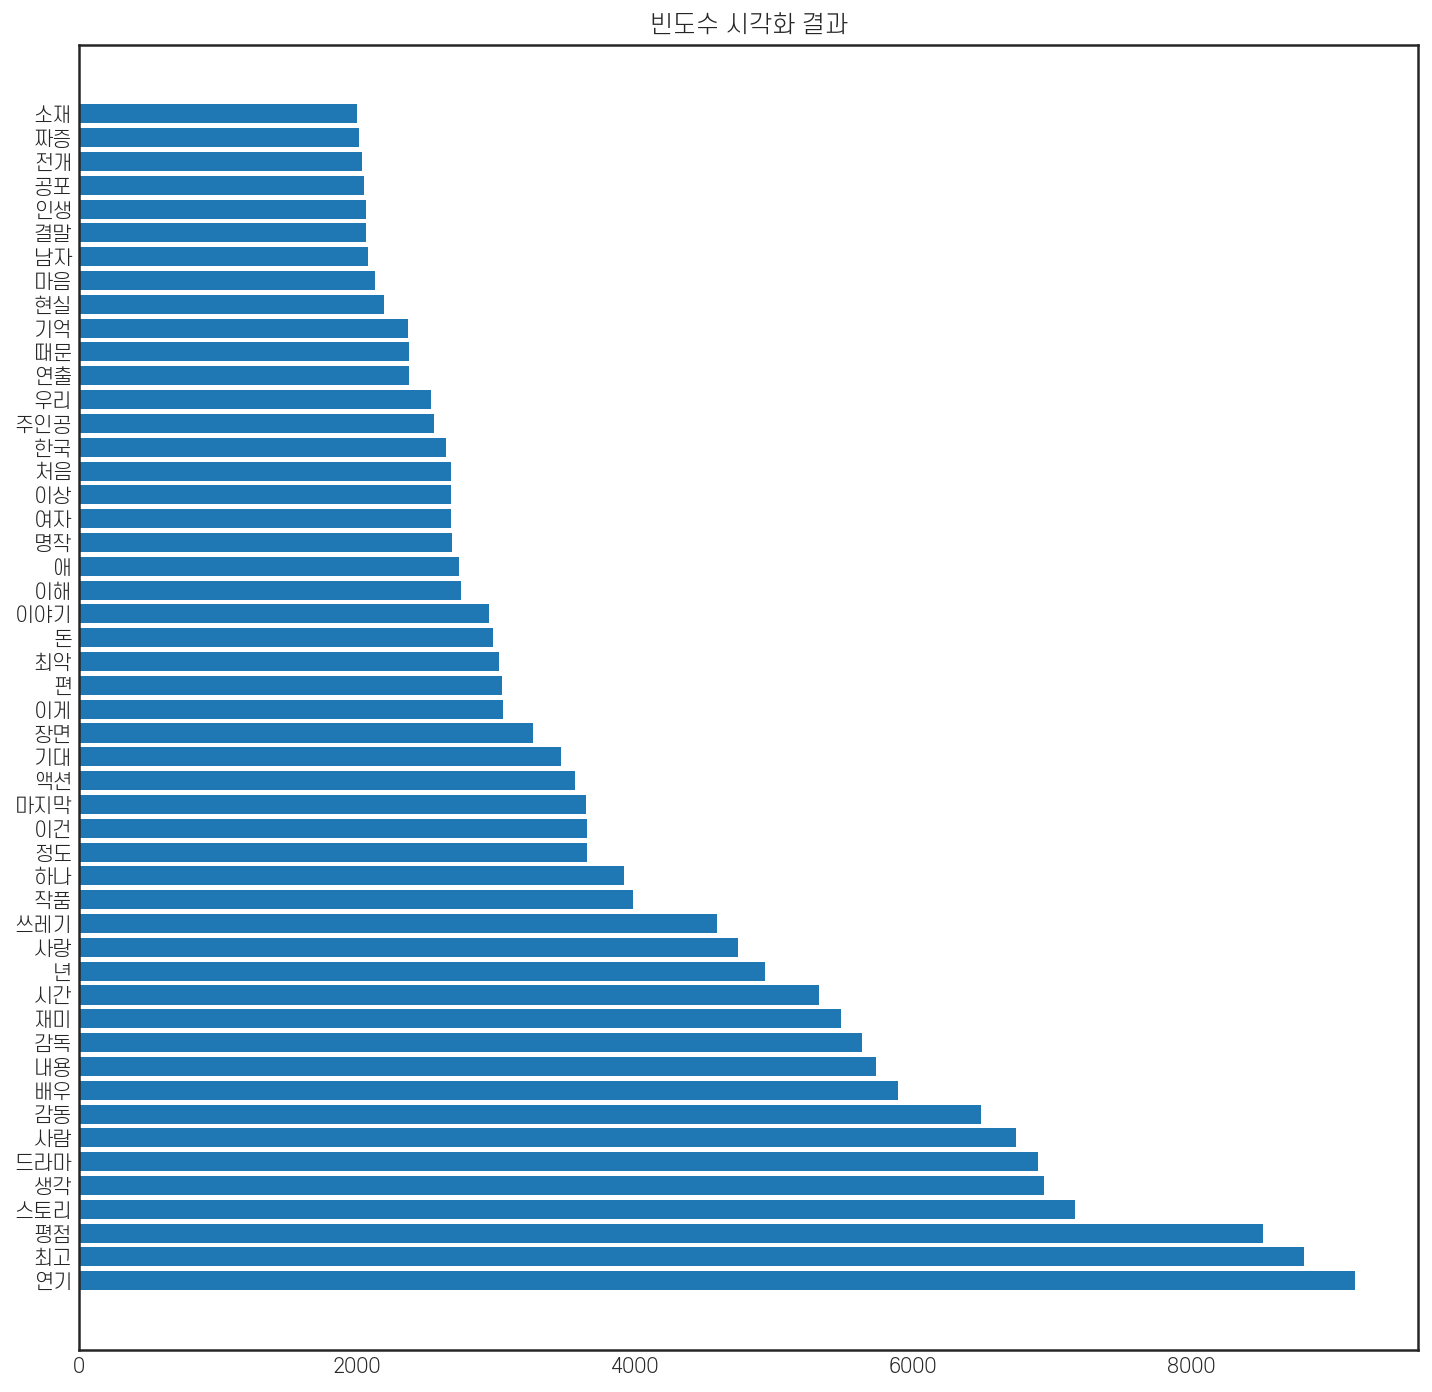

In [62]:
y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title("빈도수 시각화 결과")
plt.yticks(y_pos, top_nouns.keys())
plt.show()


## 워드클라우드(WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [67]:
# pip install wordcloud

* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [69]:
from wordcloud import WordCloud

In [72]:
# 워드클라우드 객체 생성 
    # 배경색 설정 및 사용하고자 하는 글꼴의 위치를 입력해 초기화 
wc = WordCloud(background_color='white',font_path='C:/Users/wnsgn/AppData/Local/Microsoft/Windows/Fonts/SCDream6.otf')
# 빈도수 기반 생성(입력으로 값:빈도의 dict입력)
wc.generate_from_frequencies(top_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

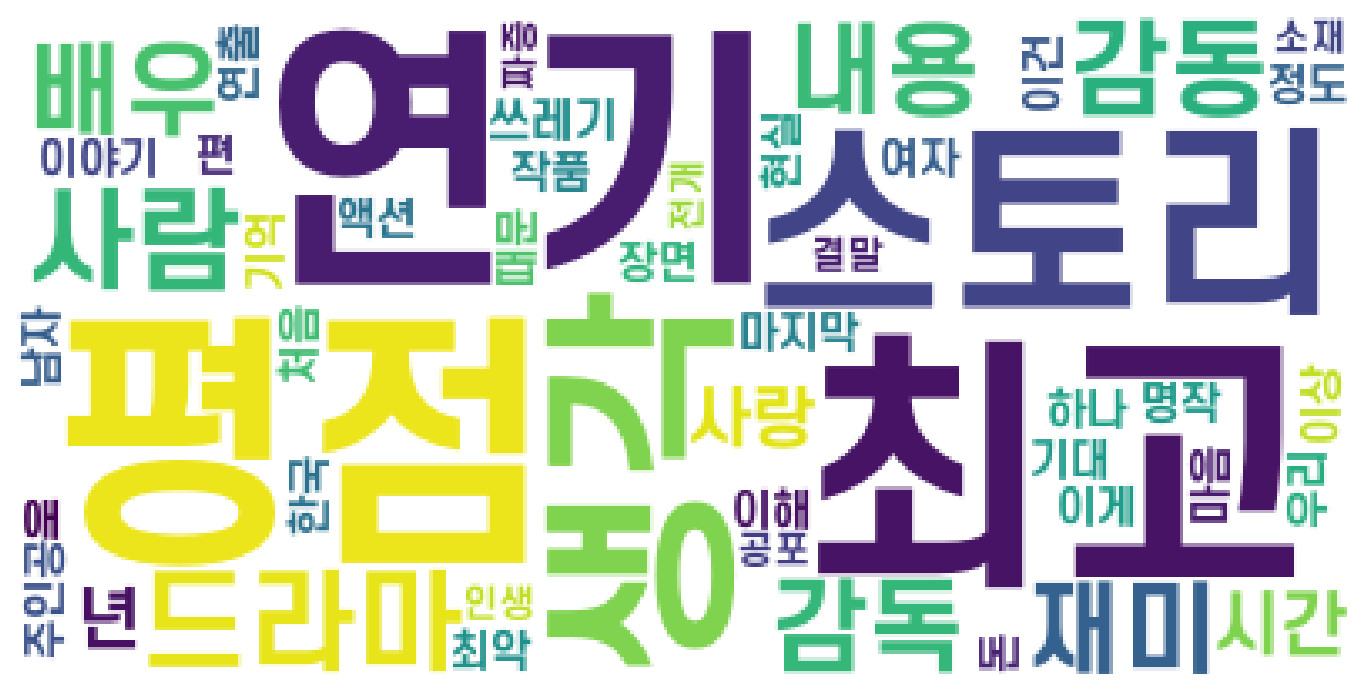

In [75]:
figure= plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [77]:
# pip install squarify

In [78]:
import squarify

In [79]:
# 색상 표시를 위해 최대 최소값으로 표준화를 진행합니다. 
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                           vmax= max(top_nouns.values()))


In [82]:
# 색상표에 정규화된 값을 통해 색상을 매칭해줍니다.
colors = [mpl.cm.Spectral_r(norm(value)) for value in top_nouns.values()]

<AxesSubplot:>

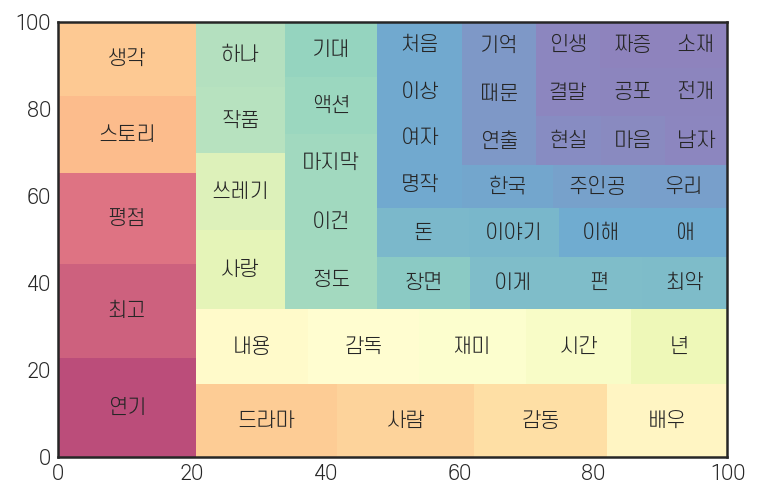

In [84]:
squarify.plot(label=top_nouns.keys(),
             sizes=top_nouns.values(),
             color=colors,
             alpha=0.7)